# Black Friday Sales Prediction - RMSE: 2638
# Present Rank : 972-973, Previous Rank : 965-968
Problem Statement : 

'A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.'


 - Coded by Saanvi Birla, Suryansh Singh Rajawat & Yash Haldar as a DATA WRANGLING PROJECT



## Importing Basic Libraries

In [45]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Loading the Datasets

In [46]:
# Read train data
train = pd.read_csv('train.csv')
# Read test data
test = pd.read_csv('test.csv')
df2 = test.copy() # in order to create the submission file

Getting basic info or an overview of the data

In [47]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [48]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [50]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [51]:
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

# EDA : EXPLORATORY DATA ANALYSIS

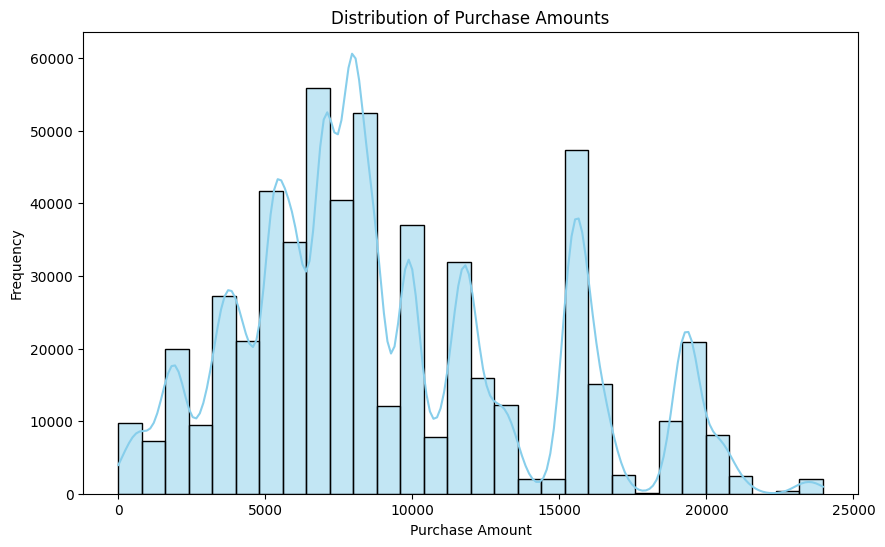

In [52]:
# Distribution of Purchase Amounts
plt.figure(figsize=(10, 6))
sns.histplot(train['Purchase'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

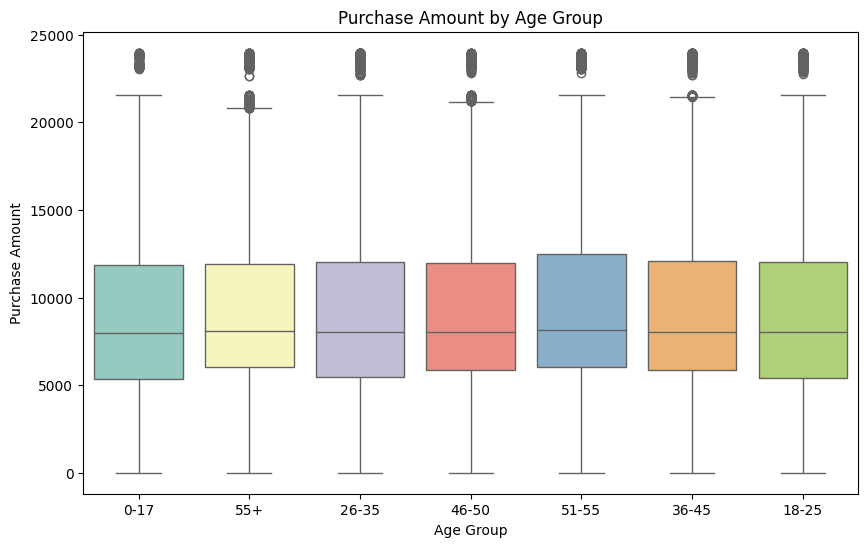

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=train, palette='Set3')
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()


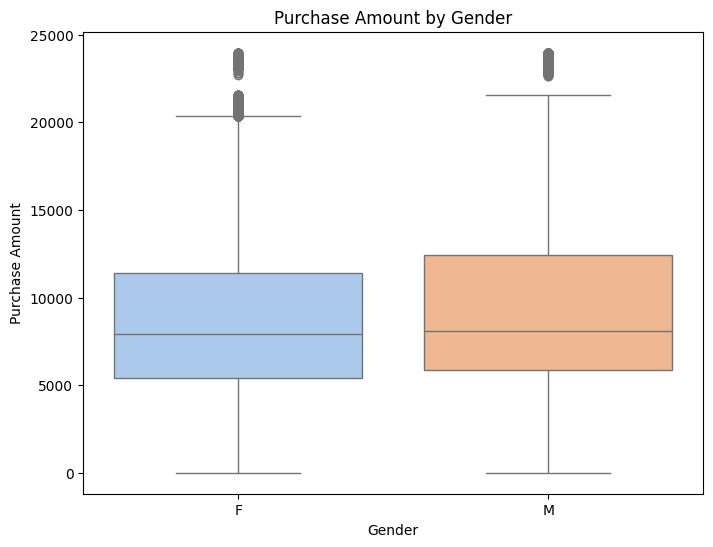

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase', data=train, palette='pastel')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


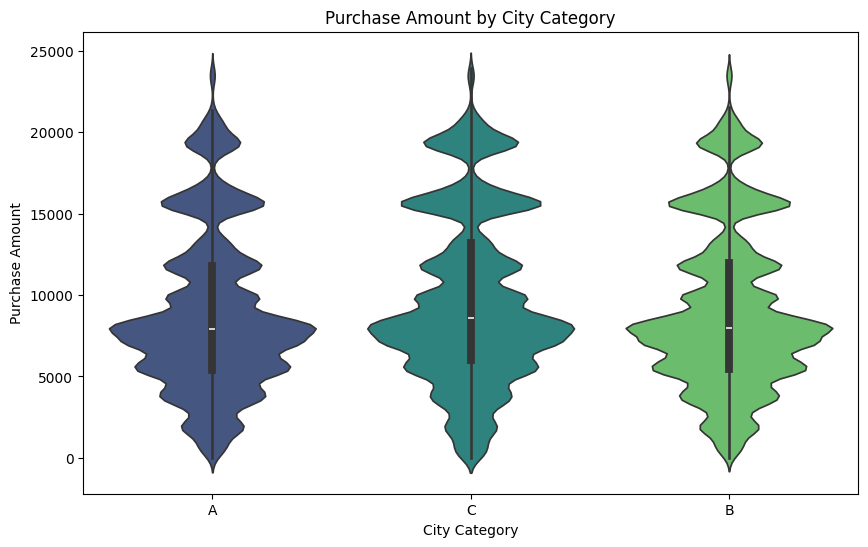

In [55]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='City_Category', y='Purchase', data=train, palette='viridis')
plt.title('Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()


## Importing more libraries for encoding and scaling

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
train['User_ID'] = train['User_ID']
test['User_ID'] = test['User_ID']

## Feature Engineering

In [57]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
train['Product_ID'] = scaler.fit_transform(train['Product_ID'].values.reshape(-1, 1))
test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

In [58]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1',
           'Product_Category_2', 'Product_Category_3']

In [59]:
train['Age']=train['Age'].replace('0-17',17)
train['Age']=train['Age'].replace('18-25',25)
train['Age']=train['Age'].replace('26-35',35)
train['Age']=train['Age'].replace('36-45',45)
train['Age']=train['Age'].replace('46-50',50)
train['Age']=train['Age'].replace('51-55',55)
train['Age']=train['Age'].replace('55+',60)

In [60]:
test['Age']=test['Age'].replace('0-17',17)
test['Age']=test['Age'].replace('18-25',25)
test['Age']=test['Age'].replace('26-35',35)
test['Age']=test['Age'].replace('36-45',45)
test['Age']=test['Age'].replace('46-50',50)
test['Age']=test['Age'].replace('51-55',55)
test['Age']=test['Age'].replace('55+',60)

In [61]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)

filling missing values with zero

In [62]:
train = train.fillna(0)
test = test.fillna(0)

## Encoding

In [63]:
# Encoding categorical columns

encoder = LabelEncoder()

for col in categorical_col:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [64]:
# Scaling numerical columns

scaler = StandardScaler()

for col in numerical_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [65]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,-1.028774,0,-2.059570,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,1000001,0.722139,0,-2.059570,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,1000001,-0.845799,0,-2.059570,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,1000001,-0.869157,0,-2.059570,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1000002,1.077382,1,2.094842,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


# Model starts from here

In [66]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
X_test = test

# Split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)

In [67]:
# Import required libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Prepare the data
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
X_test = test

# Store original IDs before splitting
original_test_product_ids = df2['Product_ID'].copy()
original_test_user_ids = df2['User_ID'].copy()

# Split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)

# Initialize XGBoost with optimized parameters
xgb_reg = XGBRegressor(
    learning_rate=0.01,          # Reduced to allow more granular improvements
    max_depth=12,                # Increased to capture more complex patterns
    min_child_weight=1,          # Reduced to allow for finer splits
    n_estimators=2000,           # Increased number of trees
    subsample=0.8,               # Random sampling of training data
    colsample_bytree=0.8,        # Random sampling of features
    colsample_bylevel=0.8,       # Sampling at each level
    gamma=0.1,                   # Minimum loss reduction
    reg_alpha=0.1,               # L1 regularization
    reg_lambda=1.0,              # L2 regularization
    random_state=42,
    tree_method='hist',          # Faster histogram-based algorithm
    objective='reg:squarederror',
    booster='gbtree',
    eval_metric='rmse'           # Use RMSE as evaluation metric
)

# Fit the model with early stopping
xgb_reg.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],    # Increased patience for better convergence
    verbose=100                  # Print progress every 100 iterations
)

# Make predictions on validation set and calculate RMSE
y_pred_val = xgb_reg.predict(X_val)
validation_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"\nValidation RMSE: {validation_rmse:.2f}")

# Make predictions on test set
y_pred_test = xgb_reg.predict(X_test)




[0]	validation_0-rmse:4990.44397	validation_1-rmse:4977.99978
[100]	validation_0-rmse:3260.28388	validation_1-rmse:3306.54537
[200]	validation_0-rmse:2743.80110	validation_1-rmse:2844.70054
[300]	validation_0-rmse:2574.39568	validation_1-rmse:2721.18446
[400]	validation_0-rmse:2487.51303	validation_1-rmse:2674.72187
[500]	validation_0-rmse:2424.67278	validation_1-rmse:2645.78956
[600]	validation_0-rmse:2371.54193	validation_1-rmse:2624.04810
[700]	validation_0-rmse:2320.75818	validation_1-rmse:2600.36398
[800]	validation_0-rmse:2280.97242	validation_1-rmse:2585.57218
[900]	validation_0-rmse:2245.73642	validation_1-rmse:2575.10683
[1000]	validation_0-rmse:2215.31760	validation_1-rmse:2567.15664
[1100]	validation_0-rmse:2186.94691	validation_1-rmse:2560.72422
[1200]	validation_0-rmse:2159.79712	validation_1-rmse:2554.73367
[1300]	validation_0-rmse:2134.35852	validation_1-rmse:2549.95452
[1400]	validation_0-rmse:2110.47459	validation_1-rmse:2546.39647
[1500]	validation_0-rmse:2087.46179	v

## Storing the output in the csv file

In [68]:
output = pd.DataFrame({
    'Product_ID': original_test_product_ids,  # Use original Product IDs
    'User_ID': original_test_user_ids,        # Use original User IDs
    'Purchase': y_pred_test           # Keep predictions as floats
})

# Save predictions to CSV
output.to_csv('predictions_XGBoost.csv', index=False)
print("\nPredictions saved to 'predictions_XGBoost.csv'")


Predictions saved to 'predictions_XGBoost.csv'
